In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [34]:
print(tf.__version__)   # Checking the version of Tensorflow

2.8.0


In [3]:
fashion_data = tf.keras.datasets.fashion_mnist  # importing dataset from keras dataset
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

In [4]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat',
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]
# Each image is mapped to a single label. 
# Since the class names are not included with the dataset, 
# we store them here to use later when plotting the images.

### Explore the data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Inspect the first image

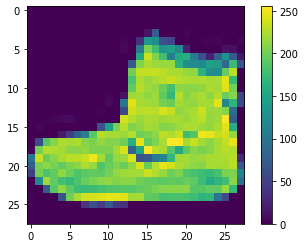

Ankle boot


In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[train_labels[0]])

In [10]:
# Bring the value from a range of (0 - 255) to a range of (0 - 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

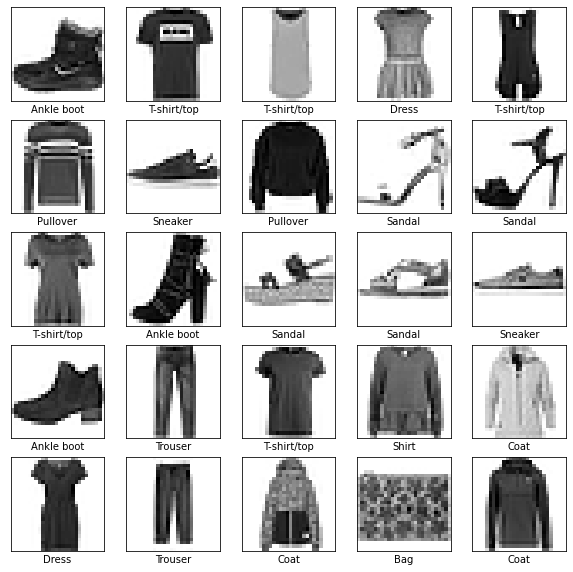

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # removes the markings of x axis
    plt.yticks([])  # removes the markings of y axis
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # showing the ith image in binary(black and white) color format
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # simply flattens the input
    tf.keras.layers.Dense(784, activation='relu'),  # Feed forward neural network layer with 784 nodes and activation layer as relu
    tf.keras.layers.Dense(128, activation='relu'),  # same with 128 nodes
    tf.keras.layers.Dense(10)   # same with 10 nodes which means the 10 classes to classify 
])

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   # loss function
    metrics=['accuracy']
)

In [15]:
model.fit(train_images, train_labels, epochs=50)    # trains the model to fit with the training images for 50 repititions

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4700 - accuracy: 0.8294
Epoch 2/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3536 - accuracy: 0.8698
Epoch 3/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3202 - accuracy: 0.8817
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2944 - accuracy: 0.8905
Epoch 5/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2797 - accuracy: 0.8956
Epoch 6/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2649 - accuracy: 0.9008
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2505 - accuracy: 0.9065
Epoch 8/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2409 - accuracy: 0.9078
Epoch 9/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2292 - accuracy: 0.9118
Epoch 10/50
1875/1875 [==============================] - 14s 8ms/step -

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)  # testing on the test dataset
print('\nTest Accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.6871 - accuracy: 0.8943

Test Accuracy:  0.8942999839782715


##### Training accuracy: 0.9689 
##### Testing accuracy: 0.8943
##### It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. **Overfitting** happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model **"memorizes"** the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

In [17]:
# getting the predictions with softmax so that we have a probability at the end of every class label
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)    # all the predictions on the test image

In [19]:
predictions[0]  # each prediction[i] is an array of size(class_label) having a total probability of 1

array([1.2912035e-27, 1.4079620e-24, 6.9085382e-38, 3.7580046e-20,
       3.8704782e-23, 1.1665214e-11, 1.1166229e-24, 1.4436261e-09,
       3.4460851e-17, 1.0000000e+00], dtype=float32)

In [20]:
np.argmax(predictions[0])   # taking max from all of the 10 classes probability

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100 * np.max(predictions_array), class_names[true_label]), color=color)
    

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

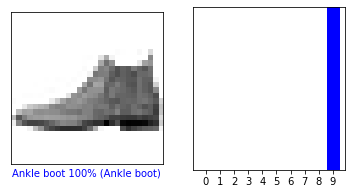

In [23]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

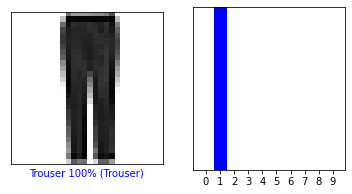

In [31]:
i = 9853
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

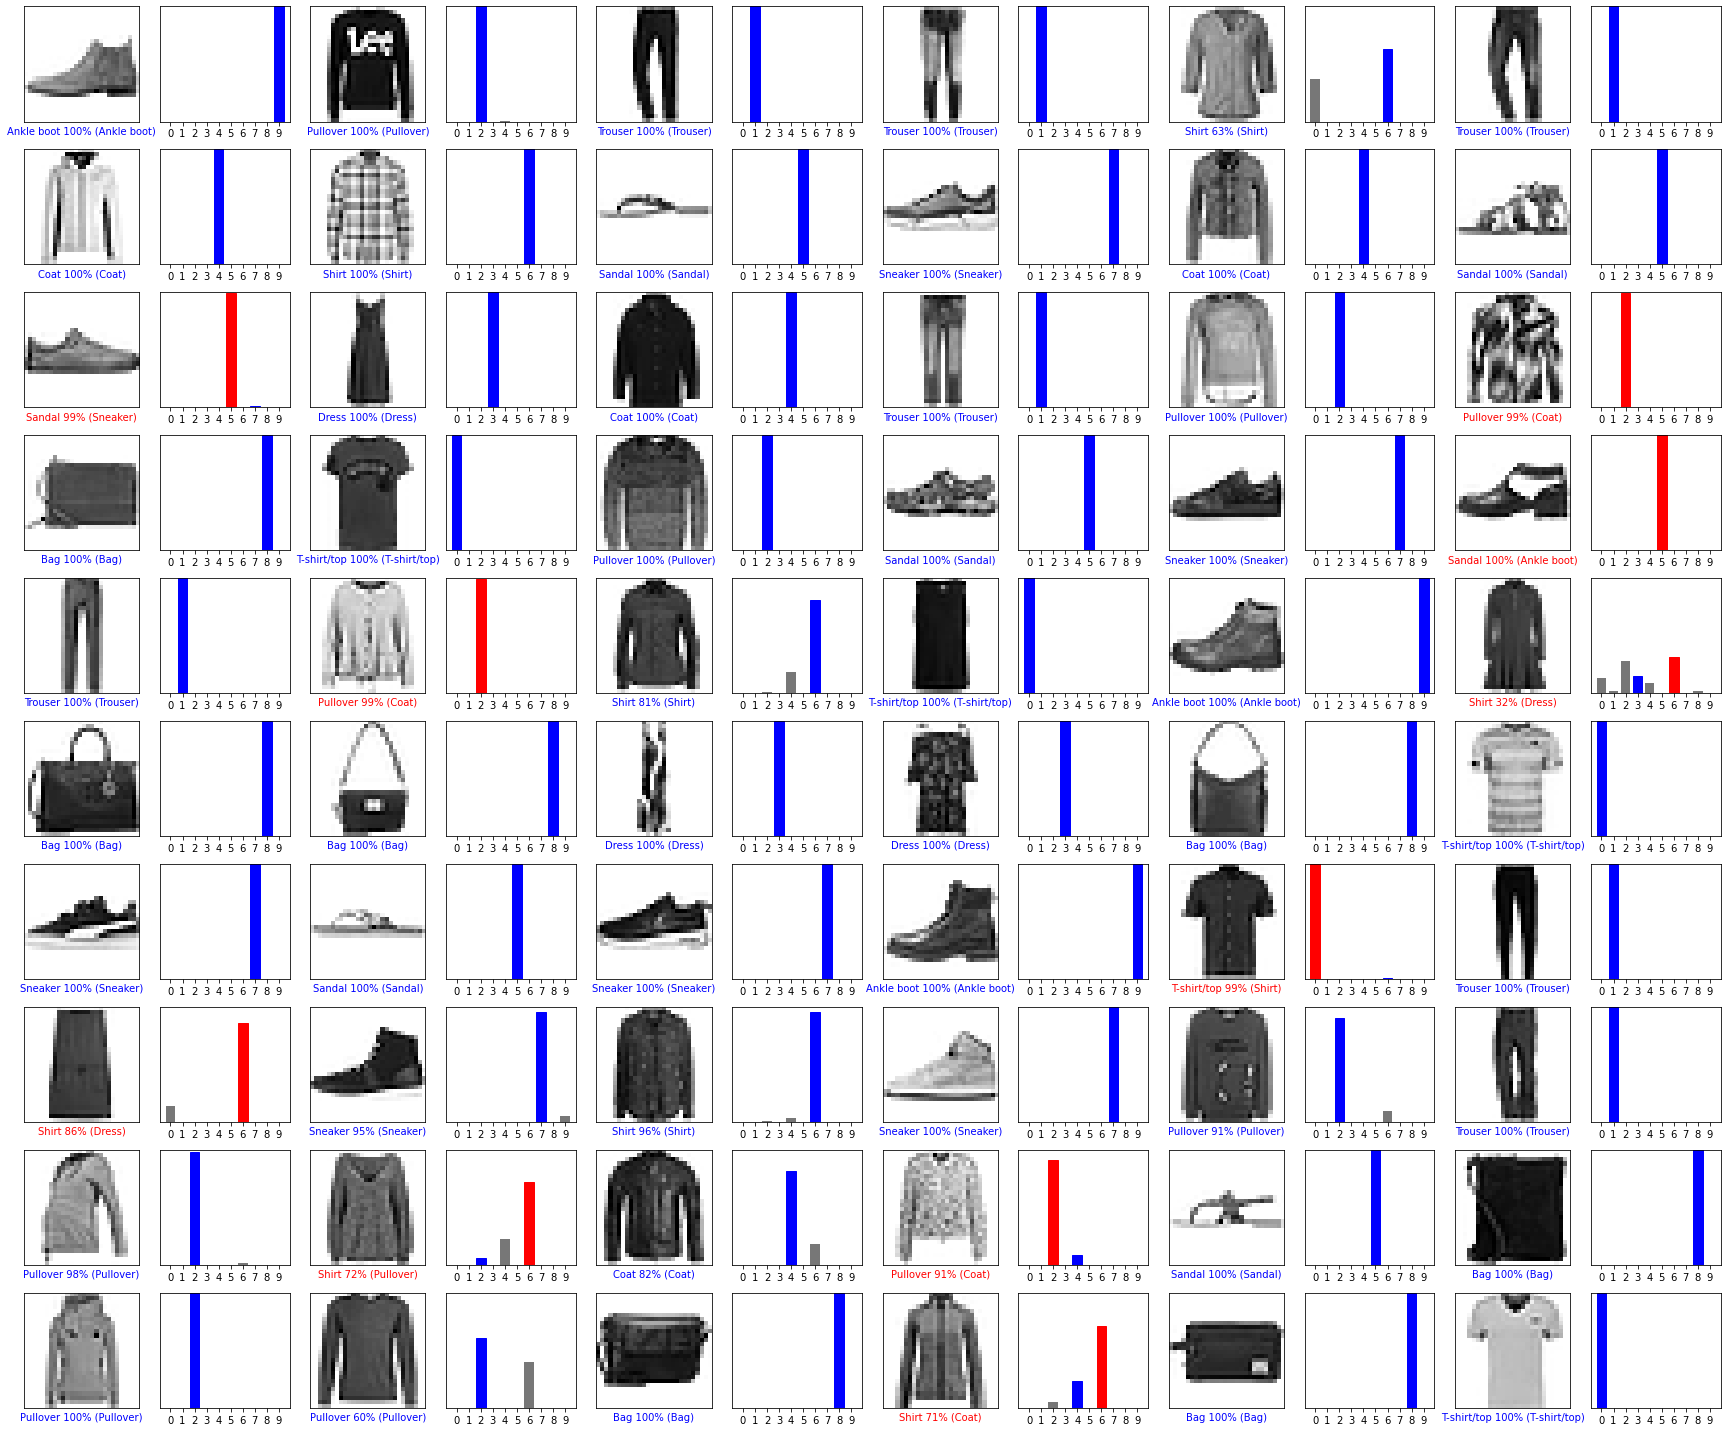

In [33]:
num_rows = 10
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

In [35]:
img = test_images[1]
print(img.shape)

(28, 28)


In [36]:
img = np.expand_dims(img, 0)
print(img.shape)

(1, 28, 28)


In [38]:
prediction_single = probability_model.predict(img)
print(prediction_single)

[[6.1099257e-05 7.5907102e-14 9.9962485e-01 4.2165743e-18 3.1297450e-04
  1.8298224e-17 1.0579640e-06 7.8784427e-17 9.4870885e-19 5.6282834e-23]]


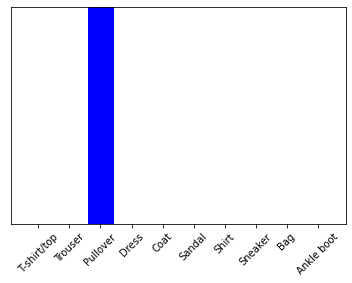

In [41]:
plot_value_array(1, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [42]:
np.argmax(prediction_single[0])

2